<a href="https://colab.research.google.com/github/Sushila-Phogat/CE888/blob/master/Lab7/Excercise_4_Skin-cancer-malignant-vs-benign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
os.environ['KAGGLE_USERNAME'] = "sushilakumari" # username from the json file
os.environ['KAGGLE_KEY'] = "7b7e1df97720863d169f8fb9bde8e713" # key from the json file
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign # api copied from kaggle

 95% 310M/325M [00:02<00:00, 120MB/s]
100% 325M/325M [00:02<00:00, 132MB/s]


In [5]:
# Upload data
from zipfile import ZipFile

file_name = "/content/skin-cancer-malignant-vs-benign.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

  

done


# Convolutional Neural Network model

In [11]:
from tensorflow.python.keras import layers
from tensorflow.python.keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
train_dir="/content/data/train"
test_dir="/content/data/test"

# Decoding the pictures into grid of pixels

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


#Train the model

In [22]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=test_generator,
                              validation_steps=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6075 - acc: 0.6675 - val_loss: 0.4667 - val_acc: 0.8200
Epoch 2/30
100/100 [==============================] - 5s 51ms/step - loss: 0.4868 - acc: 0.7606 - val_loss: 0.4679 - val_acc: 0.7200
Epoch 3/30
100/100 [==============================] - 5s 50ms/step - loss: 0.4695 - acc: 0.7646 - val_loss: 0.4370 - val_acc: 0.7800
Epoch 4/30
100/100 [==============================] - 5s 50ms/step - loss: 0.4382 - acc: 0.7817 - val_loss: 0.4275 - val_acc: 0.7800
Epoch 5/30
100/100 [==============================] - 5s 50ms/step - loss: 0.4287 - acc: 0.8030 - val_loss: 0.3663 - val_acc: 0.8200
Epoch 6/30
100/100 [==============================] - 5s 50ms/step - loss: 0.4082 - acc: 0.8047 - val_loss: 0.3932 - val_acc: 0.7700
Epoch 7/30
100/100 [==============================] - 5s 50ms/step - loss: 0.4173 - acc: 0.7992 - val_loss: 0.3308 - val_acc: 

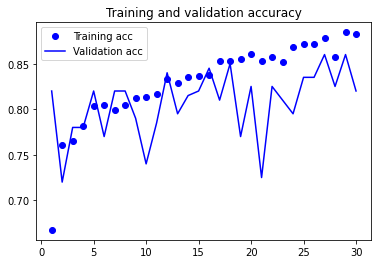

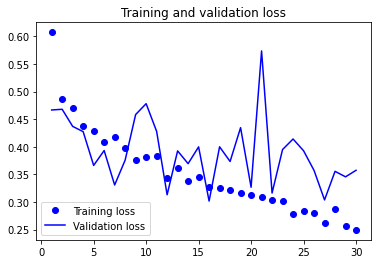

In [23]:
#model.save('aliensVsPredators_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Convolution layer with dropout

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=test_generator,
                              validation_steps=50)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 25s 246ms/step - loss: 0.5858 - acc: 0.6822 - val_loss: 0.4518 - val_acc: 0.7709
Epoch 2/20
100/100 [==============================] - 25s 249ms/step - loss: 0.4751 - acc: 0.7730 - val_loss: 0.4712 - val_acc: 0.7697
Epoch 3/20
100/100 [==============================] - 24s 243ms/step - loss: 0.4565 - acc: 0.7686 - val_loss: 0.4006 - val_acc: 0.7980
Epoch 4/20
100/100 [==============================] - 24s 238ms/step - loss: 0.4348 - acc: 0.7865 - val_loss: 0.4997 - val_acc: 0.7468
Epoch 5/20
100/100 [==============================] - 24s 237ms/step - loss: 0.4290 - acc: 0.7881 - val_loss: 0.3988 - val_acc: 0.8223
Epoch 6/20
100/100 [==============================] - 24s 237ms/step - loss: 0.4111 - acc: 0.7994 - val_loss: 0.3762 - val_acc: 0.8395
Epoch 7/20
100/100 [==============================] - 23s 234ms/step - loss: 0.4168 - acc: 0.7900 - val_los

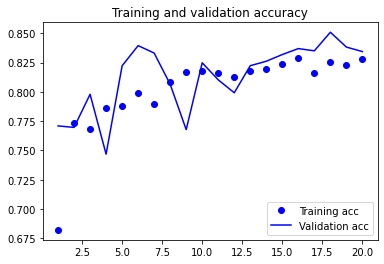

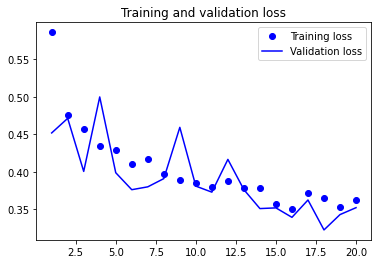

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()